In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os

In [2]:
from matplotlib import pyplot as plt

data = pd.read_csv('./train.csv')

In [3]:
data.sample(n=10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
490,22,19.05,454.05,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),0
289,47,78.90,3650.35,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,0
4623,37,104.50,3778,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
324,29,98.60,2933.2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
4449,19,100.95,1875.55,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,1
2921,1,54.50,54.5,Female,0,No,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
4579,1,19.25,19.25,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,0
1186,63,104.75,6536.5,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4894,72,110.90,7922.75,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
4778,37,92.50,3473.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [4]:
print(data.shape)
data.head()
y=data['Churn']

(5282, 20)


In [5]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
data = data.replace('?', np.nan)
data = data.dropna()

print(data.shape)

(5282, 20)


In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

columns = ('ClientPeriod MonthlySpending TotalSpent Sex IsSeniorCitizen IsSeniorCitizen HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers HasInternetService HasOnlineSecurityService HasOnlineBackup HasDeviceProtection HasTechSupportAccess HasOnlineTV HasMovieSubscription HasContractPhone IsBillingPaperless PaymentMethod') 
# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

In [8]:
def prepare_data(dataset):
    data = dataset.copy()
    data.TotalSpent.replace(to_replace=' ', value=0, inplace=True)
    data.TotalSpent = data.TotalSpent.astype(float)
    data['TotalSpent'] = data['TotalSpent'].dropna()
    data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('object')
    return data

In [9]:
data=prepare_data(data)

In [10]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen              object
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

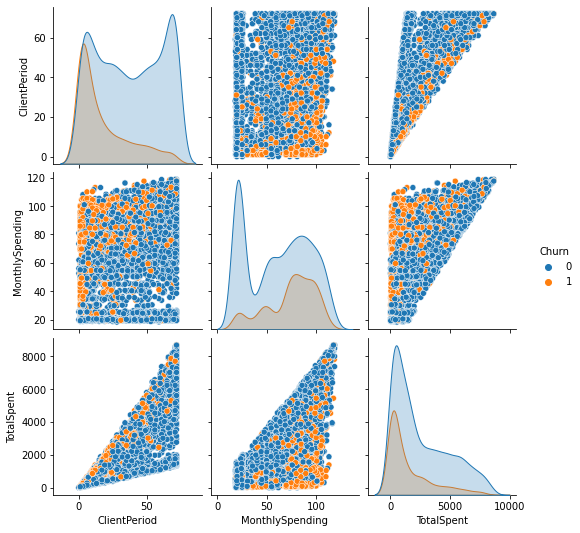

In [11]:
sns.pairplot(data[num_cols + [target_col]], hue='Churn');

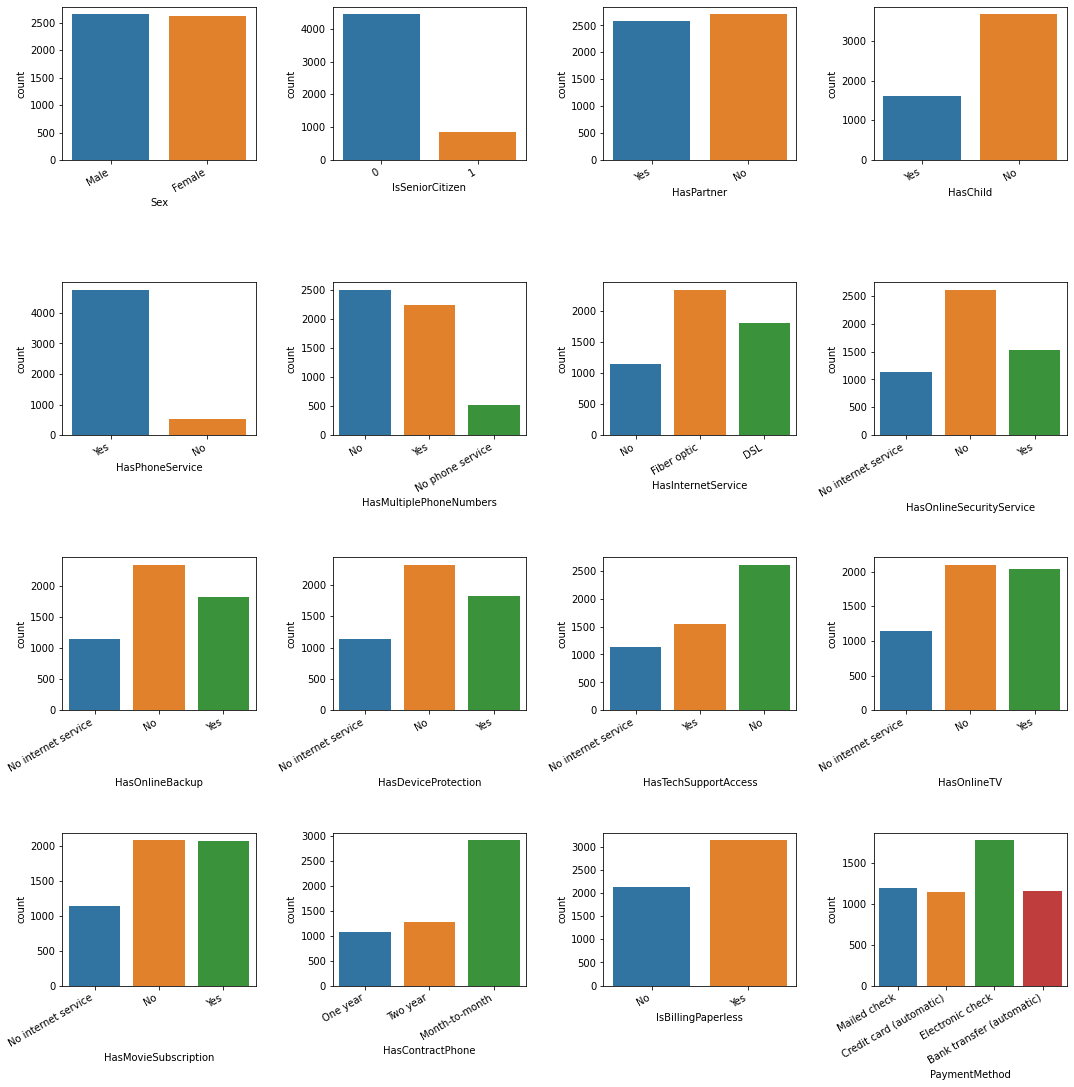

In [12]:
fig = plt.figure(figsize=(18, 18))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
for i, feat in enumerate(cat_cols):
    ax = fig.add_subplot(4, 4, i+1)
    g = sns.countplot(x=data[feat], ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')

	0.74 - rate of 0
    	0.26 - rate of 1


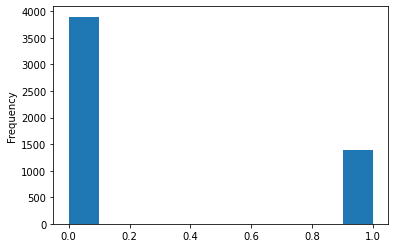

In [13]:
types, frequency = np.unique(data['Churn'], return_counts=True)
print(f"\t{round(frequency[0] / data['Churn'].shape[0], 2)} - rate of {types[0]}\n\
    \t{round(frequency[1] / data['Churn'].shape[0], 2)} - rate of {types[1]}")

data['Churn'].plot(kind='hist');

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

In [15]:
%%time
num_tranformer = StandardScaler() # нормировка
cat_tranformer = OneHotEncoder() # кодирование категориальных признаков

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_tranformer, num_cols),
        ('cat', cat_tranformer, cat_cols)
    ]
)

pipe = make_pipeline(
    preprocessor,
    LogisticRegression(solver='saga')
)

params = {
    'logisticregression__C': np.logspace(-3, 7, num=20),
    'logisticregression__penalty': ['l1', 'l2'] # добавим выбор регуляризатора
#     "classifier__C": (100, 10, 1, 0.1, 0.01, 0.001),
#     "classifier__penalty": ["l1","l2"],
}
logit_searcher = GridSearchCV(estimator=pipe, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

Wall time: 0 ns


In [16]:
X_train = data[feature_cols]
y_train = data[target_col]

In [17]:
%%time
logit_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Wall time: 7.35 s


c:\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup...
             param_grid={'logisticregression__C': array([1.00000000e-03, 3.35981829e-03, 1.12883789e-02, 3.79269019e-02,
       1.27427499e-01, 4.28133240e-01, 1.43844989e+00, 4.83293024e+00,
       1.62377674e+01, 5.45559478e+01, 1.83298071e+02, 6.15848211e+02,
       2.06913808e+03, 6.95192796e+03, 2.33572147e+04, 7.84759970e+04,
       2.63665090e+05, 8.85866790e+05, 2.97635144e+06, 1.00000000e+07]),
                         'logisticregression__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=3)

In [18]:
%%time
logit_searcher.best_score_, logit_searcher.best_params_

Wall time: 0 ns


(0.8451315975852554,
 {'logisticregression__C': 54.555947811685144,
  'logisticregression__penalty': 'l2'})

In [19]:
from catboost import CatBoostClassifier, Pool

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.1, shuffle=False)

In [38]:
%%time
catboost_clf_default = CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             task_type='GPU')

catboost_clf_default.fit(X_train, y_train)

y_train_predicted = catboost_clf_default.predict_proba(X_train)[:, 1]
y_test_predicted = catboost_clf_default.predict_proba(X_test)[:, 1]

KeyboardInterrupt: 

In [22]:
%%time
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(f'default, ROC AUC на обучающей выборке: {train_auc}')
print(f'deafault, ROC AUC на валидационной выборке: {test_auc}')

default, ROC AUC на обучающей выборке: 0.868907713079702
deafault, ROC AUC на валидационной выборке: 0.8549178317390238
Wall time: 4 ms


In [23]:
catboost_clf_default.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBor

In [26]:
%%time
catboost_clf = CatBoostClassifier()

params = {
#     'l2_leaf_reg':[2,3,4,5],
    'eval_metric':['AUC'],
    'task_type':['GPU'],
#     'loss_function': ['Logloss'],#, 'CrossEntropy'],
#     'n_estimators':[500, 1000, 1500],
#     'learning_rate': [0.02, 0.03, 0.04, 0.05],
    'random_seed':[42],# [2021],
    'verbose': [False],
    'cat_features': [cat_cols],
}

scorer = make_scorer(roc_auc_score, needs_proba=True)
catboost_grid = GridSearchCV(estimator=catboost_clf, param_grid=params, scoring=scorer, cv=5)

Wall time: 0 ns


In [27]:
%%time
catboost_grid.fit(X_train, y_train)

Wall time: 5min 5s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000019602763340>,
             param_grid={'cat_features': [['Sex', 'IsSeniorCitizen',
                                           'HasPartner', 'HasChild',
                                           'HasPhoneService',
                                           'HasMultiplePhoneNumbers',
                                           'HasInternetService',
                                           'HasOnlineSecurityService',
                                           'HasOnlineBackup',
                                           'HasDeviceProtection',
                                           'HasTechSupportAccess',
                                           'HasOnlineTV',
                                           'HasMovieSubscription',
                                           'HasContractPhone',
                                           'IsBillingPaperless',
                                           'PaymentMethod']],
                         'eval_metric': ['AUC'], 'random_seed': [42],
                         'task_type': ['GPU'], 'verbose': [False]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [28]:
%%time
best_param = catboost_grid.best_params_
best_param

Wall time: 0 ns


{'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'],
 'eval_metric': 'AUC',
 'random_seed': 42,
 'task_type': 'GPU',
 'verbose': False}

In [46]:
%%time
final_catboost_clf = CatBoostClassifier(**best_param,
                                        use_best_model=True,
#                                         cat_features=cat_cols
                                        )

train_pool =  Pool(X_train, y_train, cat_features=cat_cols)
final_catboost_clf.fit(train_pool, eval_set=(X_test, y_test))

Wall time: 54.9 s


In [47]:
%%time
train_pred = final_catboost_clf.predict_proba(X_train)[:, 1]
test_pred = final_catboost_clf.predict_proba(X_test)[:, 1]

print(f"ROC-AUC on the train data: {roc_auc_score(y_train, train_pred)}")
print(f"ROC-AUC on the test data: {roc_auc_score(y_test, test_pred)}")

ROC-AUC on the train data: 0.8681357369313574
ROC-AUC on the test data: 0.8538929184624549
Wall time: 55 ms


In [48]:
%%time
best_model = final_catboost_clf
print(f"preferable number of tree : {best_model.tree_count_}")

preferable number of tree : 851
Wall time: 0 ns


In [49]:
%%time
X_test = pd.read_csv('./test.csv')
X_test = prepare_data(X_test)

Wall time: 9 ms


In [50]:
%%time
submission = pd.read_csv('./submission.csv')
predicted =  best_model.predict_proba(X_test)[:, 1]
submission['Churn'] =  predicted

submission.to_csv('./my_submission.csv', index=False)

Wall time: 26 ms


In [51]:
submission

,Id,Churn
0,0,0.046545
1,1,0.769040
2,2,0.729430
3,3,0.012409
4,4,0.006371
...,...,...
1756,1756,0.139709
1757,1757,0.010206
1758,1758,0.864726
1759,1759,0.649473


|Модель|CV/validate|Leader Board|
   |---|---|---|
    |logit|0.84513|0.81103|
    |catboost|0.85389|0.85023|

In [53]:
#randomseed рулит
#Maksim Kleshchenok